    1.	Defining Problem Statement and Analyzing basic metrics

    BUSINESS PROBLEM

      Understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

    GOAL
    
        This analysis (EDA + Statistical analysis) aims to analyse the customer purchase behaviour to make data-driven decision making inorder to customize marketing strategies, improve customer experience and help business grow.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from IPython.display import display, Markdown
import plotly.express as px

In [3]:
df = pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.shape

(550068, 10)

***Insights:***

    There are 550068 rows(records) and 10 columns(attributes)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


***Insights:***

        No null/missing values in any of the column.
    
        Occupation, Marital_Status, Product_Category are of integer dtype.

***Insights:***

    There are total 5891 customers(both male and female)

    There are 3631 unique products in 20 categories


    Descriptibe Statistics of numerical columns

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


    Insights:

        Average purchase amount = 9264
        
        Minimum purchase amount = 12
        
        Maximum purchase amount = 23961
        
        Median purchase amount  = 8047

    Seperating numerical and categorical columns

In [7]:
num_cols=df.select_dtypes(include=["number"]).columns.tolist()
cat_cols=df.select_dtypes(include=["object"]).columns.tolist()

    Checking unique values in numerical columns

In [8]:
df[num_cols].nunique()

User_ID              5891
Occupation             21
Marital_Status          2
Product_Category       20
Purchase            18105
dtype: int64

In [9]:
for col in num_cols:
    display(Markdown(f"***Unique values in column {col}:***"))
    print(df[col].unique())
    print("="*100)

***Unique values in column User_ID:***

[1000001 1000002 1000003 ... 1004113 1005391 1001529]


***Unique values in column Occupation:***

[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]


***Unique values in column Marital_Status:***

[0 1]


***Unique values in column Product_Category:***

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]


***Unique values in column Purchase:***

[ 8370 15200  1422 ...   135   123   613]


    There are 5891 registered customers

    20 Product categories


    Checking unique values in categorical columns

In [10]:
df[cat_cols].nunique()

Product_ID                    3631
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
dtype: int64

In [11]:
for col in cat_cols:
    display(Markdown(f"***Unique values in column {col}:***"))
    print(df[col].unique())
    print("="*100)

***Unique values in column Product_ID:***

['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']


***Unique values in column Gender:***

['F' 'M']


***Unique values in column Age:***

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


***Unique values in column City_Category:***

['A' 'C' 'B']


***Unique values in column Stay_In_Current_City_Years:***

['2' '4+' '3' '1' '0']


        There are 3631 unique products in 20 categories

        City categories - A, B, C

***Checking top 5 frequency of values in categorical columns***

In [12]:
for col in cat_cols:
    display(Markdown(f"***value_counts in column {col}:***"))
    print(df[col].value_counts().head())
    print("="*100)

***value_counts in column Product_ID:***

Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: count, dtype: int64


***value_counts in column Gender:***

Gender
M    414259
F    135809
Name: count, dtype: int64


***value_counts in column Age:***

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
Name: count, dtype: int64


***value_counts in column City_Category:***

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64


***value_counts in column Stay_In_Current_City_Years:***

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64


    Checking top 5 frequency of values in numerical columns

In [13]:
for col in num_cols:
    display(Markdown(f"***value_counts in column {col}:***"))
    print(df[col].value_counts().head())
    print("="*100)

***value_counts in column User_ID:***

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
Name: count, dtype: int64


***value_counts in column Occupation:***

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
Name: count, dtype: int64


***value_counts in column Marital_Status:***

Marital_Status
0    324731
1    225337
Name: count, dtype: int64


***value_counts in column Product_Category:***

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
Name: count, dtype: int64


***value_counts in column Purchase:***

Purchase
7011    191
7193    188
6855    187
6891    184
6960    183
Name: count, dtype: int64


***Insights:***

    1. Product_id P00265242 is the most purchased item in terms of volume.
    
    2. Items belonging to Product_category-5 was purchased the most in terms of volume.
    
    3. Males purchased almost 3 times more than females.
    
    4. Customers of the age group 26-35 purchased more than any other age group.
    
    5. Most of the people (approx 53%) are resident to the current city for 1-2 years.
    
    6. Unmarried people shopped more than married people.

    Visual Analysis (univariate & bi-variate)

    Numerical columns

In [14]:
num_cols

['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

<Axes: xlabel='Occupation', ylabel='Count'>

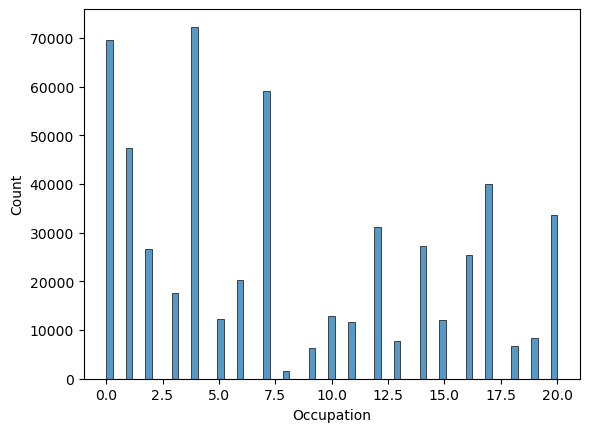

In [15]:
sns.histplot(df['Occupation'])

In [19]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [ ]:
plt.bar(x=df['Marital_Status'].index, height =df['Marital_Status'].values )
plt.show()

KeyboardInterrupt: 

    Checking correlation/dependence between variables

In [ ]:
df_copy=df.copy()

    Replacing string values with numerical values

In [ ]:
df_copy['Gender']= df_copy['Gender'].replace(['F', 'M'], [0, 1])

df_copy['City_Category']= df_copy['City_Category'].replace(['A', 'B', 'C'], [0, 1, 2])

df_copy['Age']= df_copy['Age'].replace(['0-17', '18-25', '26-35','36-45','46-50','51-55','55+'], [0, 1, 2, 3, 4, 5, 6]) 

df_copy['Stay_In_Current_City_Years']= df_copy['Stay_In_Current_City_Years'].replace(['0', '1', '2', '3','4+'], [0, 1, 2, 3, 4]) 

pd.set_option('future.no_silent_downcasting', True)

In [ ]:
df_copy.iloc[:,2:9].corr()

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_copy.iloc[:,2:10].corr(), cmap="YlGnBu", annot=True)
plt.show()

***Insights:***
    
        There is not much correlation or dependencies between any of the variables

    Segregating Male and Female customers

In [ ]:
male_cust = df[df['Gender']=='M']
male_cust.head()

In [ ]:
female_cust = df[df['Gender']=='F']
female_cust.head()

In [ ]:
print(df['User_ID'].nunique(), male_cust['User_ID'].nunique(), female_cust['User_ID'].nunique())

***Insights:***

        Total Customers  - 5891

        Male Customers   - 4225

        Female Customers - 1666

    Male/Female share in sales

In [ ]:
gender_share = df.groupby('Gender')['Purchase'].sum()
gender_share

In [ ]:
plt.pie(gender_share,autopct='%1.1f%%',startangle=90)
plt.legend(gender_share.index)
plt.title("Male/Female Vs Purchase")
plt.show()

    Percentage of male and female customers

In [ ]:
plt.pie(unique_gender,autopct='%1.1f%%',startangle=90)
plt.legend(gender_share.index)
plt.title("Male Vs Female customers")
plt.show()

***Insights :***

    1. There are 4225 male customers and 1666 female customers in the sample data.
        
    2. In terms of total purchase, male customers constitute 76.7% and female customers 23.3% of total purchase.
        
    3. However, difference between the average spending by male customers (Rs.9437)and female customers (Rs. 8734) is only Rs 700.

    4. This points to the fact that female customers though lesser in number compared to male customers may be shopping expensive items more.
        

    Checking spending behaviour of Male & Female

In [ ]:
p25_value_0 = np.percentile(female_cust['Purchase'], 25) 
bottom_quartile_purchases_female = female_cust[female_cust['Purchase'] <= p25_value_0]

p25_value_1 = np.percentile(male_cust['Purchase'], 25) 
bottom_quartile_purchases_male = male_cust[male_cust['Purchase'] <= p25_value_1]

In [ ]:
print(bottom_quartile_purchases_female['User_ID'].nunique())
print(bottom_quartile_purchases_male['User_ID'].nunique())

In [ ]:
p50_value_0 = np.percentile(female_cust['Purchase'], 50) 
second_quartile_purchases_female = female_cust[(female_cust['Purchase'] >p25_value_0)&(female_cust['Purchase'] <= p50_value_0)]

p50_value_1 = np.percentile(male_cust['Purchase'], 50) 
second_quartile_purchases_male = male_cust[(male_cust['Purchase'] >p25_value_1)&(male_cust['Purchase'] <= p50_value_1)]

In [ ]:
print(second_quartile_purchases_female['User_ID'].nunique())
print(second_quartile_purchases_male['User_ID'].nunique())

In [ ]:
p75_value_0 = np.percentile(female_cust['Purchase'], 75) 
third_quartile_purchases_female = female_cust[(female_cust['Purchase'] >p50_value_0)&(female_cust['Purchase'] <= p75_value_0)]

p75_value_1 = np.percentile(male_cust['Purchase'], 75) 
third_quartile_purchases_male = male_cust[(male_cust['Purchase'] >p50_value_1)&(male_cust['Purchase'] <= p75_value_1)]

In [ ]:
print(third_quartile_purchases_female['User_ID'].nunique())
print(third_quartile_purchases_male['User_ID'].nunique())

In [ ]:

fourth_quartile_purchases_female = female_cust[female_cust['Purchase'] >p75_value_0]

fourth_quartile_purchases_male = male_cust[male_cust['Purchase'] >p75_value_1]

In [ ]:
print(fourth_quartile_purchases_female['User_ID'].nunique())
print(fourth_quartile_purchases_male['User_ID'].nunique())

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle("Purchase Distribution : Male Vs Female in 1st Quartile")
plt.subplot(1,2,1)
sns.histplot(x=bottom_quartile_purchases_female['Purchase'],kde=True, bins=50, color='crimson', edgecolor='black')
plt.title("Female")
plt.subplot(1,2,2)
sns.histplot(x=bottom_quartile_purchases_male['Purchase'],kde=True, bins =50, color='dodgerblue', edgecolor='black')
plt.title("Male")
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle("Purchase Distribution : Male Vs Female in 2nd Quartile")
plt.subplot(1,2,1)
sns.histplot(x=second_quartile_purchases_female['Purchase'],kde=True, bins=50, color='crimson', edgecolor='black')
plt.title("Female")
plt.subplot(1,2,2)
sns.histplot(x=second_quartile_purchases_male['Purchase'],kde=True, bins =50, color='dodgerblue', edgecolor='black')
plt.title("Male")
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle("Purchase Distribution : Male Vs Female in 3rd Quartile")
plt.subplot(1,2,1)
sns.histplot(x=third_quartile_purchases_female['Purchase'],kde=True, bins=50, color='crimson', edgecolor='black')
plt.title("Female")
plt.subplot(1,2,2)
sns.histplot(x=third_quartile_purchases_male['Purchase'],kde=True, bins =50, color='dodgerblue', edgecolor='black')
plt.title("Male")
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.suptitle("Purchase Distribution : Male Vs Female in 4th Quartile")
plt.subplot(1,2,1)
sns.histplot(x=fourth_quartile_purchases_female['Purchase'],kde=True, bins=50, color='crimson', edgecolor='black')
plt.title("Female")
plt.subplot(1,2,2)
sns.histplot(x=fourth_quartile_purchases_male['Purchase'],kde=True, bins =50, color='dodgerblue', edgecolor='black')
plt.title("Male")
plt.show()

    Females buy expensive items or shop more as can be seen from the surge in the number of female customers in the 3rd and 4th quartile.

    However, both male and female had purchased more in the upper bound of 1st quartile

    2nd quartile saw a decline in the purchasing habit of both male and female.

    Most of the males purchased in the 1st and last quartile.

    Calculating Confidence Interval Using Sample_mean

In [ ]:
from scipy.stats import norm

In [ ]:
mean_female = female_cust['Purchase'].mean()
std_female = female_cust['Purchase'].std()
n_female = female_cust['Purchase'].count()

mean_male = male_cust['Purchase'].mean()
std_male = male_cust['Purchase'].std()
n_male = male_cust['Purchase'].count()

print(f"mean_female: {mean_female} \nstd_female: {std_female}{n_female}")
print('='*40)
print(f"mean_male: {mean_male} \nstd_male: {std_male}{n_male}")

    At 95% Confidence Level

    Female

In [ ]:
ci_female = stats.norm.interval(0.95, loc=mean_female, scale=std_female/np.sqrt(n_female))
print(f"mean_female: {mean_female:.2f}, \nConfidence Interval: ({ci_female[0]:.2f} - {ci_female[1]:.2f})")

    Male

In [ ]:
ci_male = stats.norm.interval(0.95, loc=mean_male, scale=std_male/np.sqrt(n_male))
print(f"mean_male: {mean_male:.2f}, \nConfidence Interval: ({ci_male[0]:.2f} - {ci_male[1]:.2f})")

    Insights : 
            mean_female: 8734.57, 
            Confidence Interval: (8709.21, 8759.92)
            With 95% confidence , we can say that true average purchase amount of females lie between 8709 and 8759 in population

            mean_male: 9437.53, 
            Confidence Interval: (9422.02, 9453.03)
            With 95% confidence , we can say that true average purchase amount of males lie between 9422 and 9453 in population

    Applying the Central Limit Theorem to compute intervals with different confidence levels and sample sizes

In [ ]:
def calc_confidence_intervals(mean, std, total_n, sample_size, confidence_levels):
    intervals = {}
    for level in confidence_levels:
        sampled_std_error = std / np.sqrt(sample_size)
        ci = stats.norm.interval(level, loc=mean, scale=sampled_std_error)
        intervals[level] = ci
    return intervals

sample_sizes = [100, 1000, 10000]

confidence_levels = [0.90, 0.95, 0.99]

ci_female= {n: calc_confidence_intervals(mean_female, std_female, n_female, n, confidence_levels) 
                    for n in sample_sizes}

ci_male= {n: calc_confidence_intervals(mean_male, std_male, n_male, n, confidence_levels) 
                  for n in sample_sizes}

ci_female, ci_male

    Summary:

        Female : True average purchase amount at different sample size & confidence level

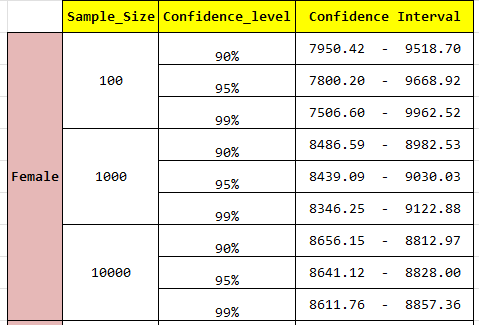

        Male : True average purchase amount at different sample size & confidence level

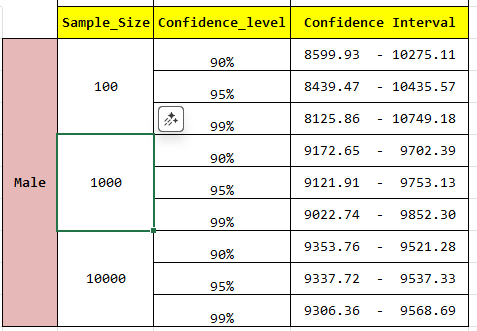

    Inference : 
        As the confidence level is increasing, we can see that the window is widening which means true 
        population mean can be estimated with higher confidence and wider interval or lower confidence and narrow interval  .There is always a trade-off between confidence level and confidence interval, depending upon the business objectives we have to select the confidence interval  or the level of accuracy we want.